<a href="https://colab.research.google.com/github/dionysus98/l_torch/blob/main/01_torch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch workflow

- Resources:
  - [Pytorch Book](https://www.learnpytorch.io/)
  - [Source code for the book](https://github.com/mrdbourke/pytorch-deep-learning)

In [1]:
to_cover = {
    1: "data (prepare and load)",
    2: "build a model",
    3: "fitting(traning) the modal",
    4: "making predictions and evaluating the model",
    5: "saving, loading the model",
    6: "putting it all together"
    }

In [2]:
import torch
from torch import nn ## neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

## 1. Data - Preparing and Loading

In [3]:
# Linear regression

# make a straight line with *known* paramters
w = 0.7 #weight
b = 0.3 #bias

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1) # input matrix `X`
# y = Ax + b, slope formula
y = w * X + b # output

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Spliting data into training and test sets

- traning set
- validation set [?]
- test set



In [4]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test),


(40, 40, 10, 10)

### Visualize data

In [5]:
def plot_preds(train_data=X_train, train_labels=y_train,
               test_data=X_test, test_labels=y_test,
               predictions=None):
  "Plots training & test data, compares predictions"
  plt.figure(figsize=(7, 7))
  # plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

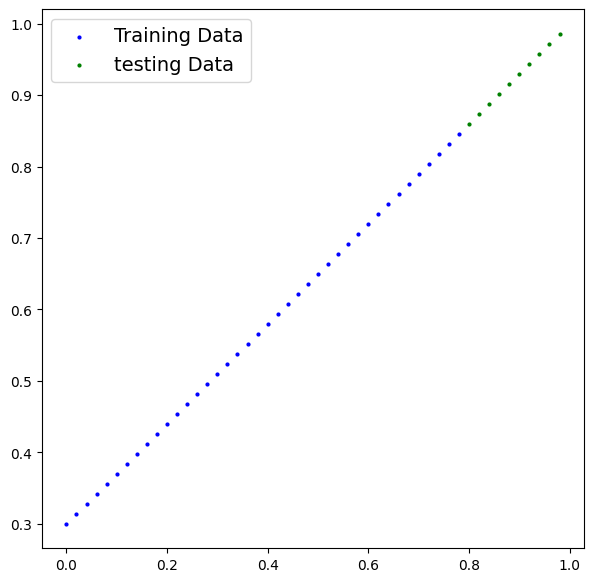

In [ ]:
plot_preds()

## 2. Build Model

In [6]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
    torch.randn(1,
          requires_grad=True,
          dtype=torch.float))

    self.bias = nn.Parameter(
    torch.randn(1,
          requires_grad=True,
          dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### model building essentials
- torch.nn
- torch.nn.Parameter
- torch.nn.Module
- torch.optim
- def forward()
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

In [85]:
# create a random seed
torch.manual_seed(42)

# instantiate the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [86]:
# named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making prediction using `torch.inference_mode()`

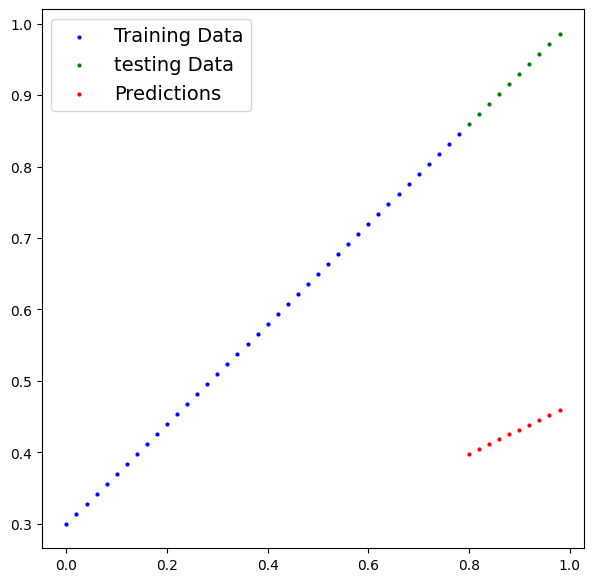

In [87]:
# make predictions/inference with model
with torch.inference_mode(): # removes the gradient info, since we are just doing forward pass
  y_preds = model_0(X_test)

plot_preds(predictions=y_preds)

## 3. Training Model

Things we need for training:
- loss function
- optimizer


In [88]:
## Learning Rate
lr = 0.01

## loss function - MAE
loss_fn = nn.L1Loss()

## Optimizer - Stochastic Gradient Descent
optimizer = torch.optim.SGD(
    model_0.parameters(),
    lr=lr)

### Building a training Loop
0. loop through the data
1. Forward pass
2. calculate the loss
3. Optimizer Zero grad
4. Loss Backward: BackProp
5. Optimizer step


In [89]:
torch.manual_seed(42)
# An epoch is one loop through the data..
epochs = 200

# Track
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # sets all params that require grad to require grad

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. calc Loss MAE
  loss = loss_fn(y_pred, y_train)

  # 3. Optim Zero Grad
  optimizer.zero_grad()

  # 4. Backward Pass
  loss.backward()

  # 5. Step the optim (perform grad descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off stuff not needed for testing

  with torch.inference_mode(): # turns off grad tracking
      # 1. Forward Pass
      test_pred = model_0(X_test)

      # 2. calc Loss
      test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"k: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    for item in model_0.state_dict().items():
      print(item)

k: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
('weights', tensor([0.3406]))
('bias', tensor([0.1388]))
k: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
('weights', tensor([0.3796]))
('bias', tensor([0.2388]))
k: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
('weights', tensor([0.4184]))
('bias', tensor([0.3333]))
k: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
('weights', tensor([0.4512]))
('bias', tensor([0.3768]))
k: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
('weights', tensor([0.4748]))
('bias', tensor([0.3868]))
k: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
('weights', tensor([0.4938]))
('bias', tensor([0.3843]))
k: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
('weights', tensor([0.5116]))
('bias', tensor([0.3788]))
k: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
('weights', tensor([0.5288]))
('bias', tensor([0.3718]))
k: 80 | Los

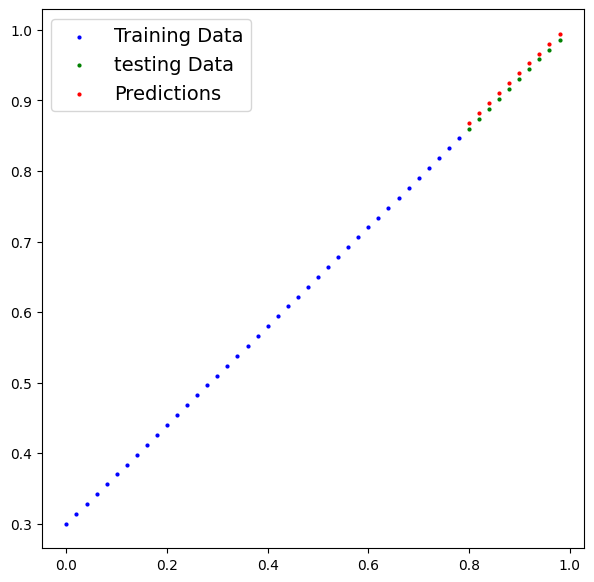

In [90]:
# make predictions/inference with model
with torch.inference_mode(): # removes the gradient info, since we are just doing forward pass
  y_preds_new = model_0(X_test)

plot_preds(predictions=y_preds_new)

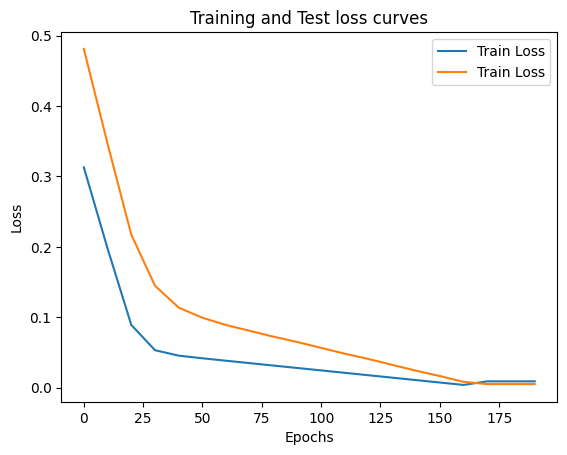

In [92]:
import numpy as np

plt.plot(epoch_count,
         np.array(torch.tensor(loss_values).cpu().numpy()),
         label="Train Loss")
plt.plot(epoch_count,
         np.array(torch.tensor(test_loss_values).cpu().numpy()),
         label="Train Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving & Loading Models

1. `torch.save()` - saves a object in python pickle format
2. `torch.load()`
3. `torch.nn.Module.load_state_dict()`

In [93]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [98]:
# Saving Model
from pathlib import Path

# create a directory
# MODEL_PATH = Path("drive/MyDrive/ML/torch/models")
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:
# Save the state_dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [104]:
# Loading Model
model_0_loaded = LinearRegressionModel()
model_0_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),)

In [105]:
model_0_loaded.state_dict(),

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),)

In [107]:
# Make predictions with the loaded model

model_0_loaded.eval() # turns off stuff not needed for testing
with torch.inference_mode(): # turns off grad tracking
    # 1. Forward Pass
    loaded_preds = model_0_loaded(X_test)

In [108]:
# Make predictions with the loaded model
model_0.eval() # turns off stuff not needed for testing
with torch.inference_mode(): # turns off grad tracking
    # 1. Forward Pass
    y_preds = model_0(X_test)

In [110]:
y_preds == loaded_preds,

(tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]]),)

## 6. Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [32]:
w = 0.8
b = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = (w * X) + b

In [33]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

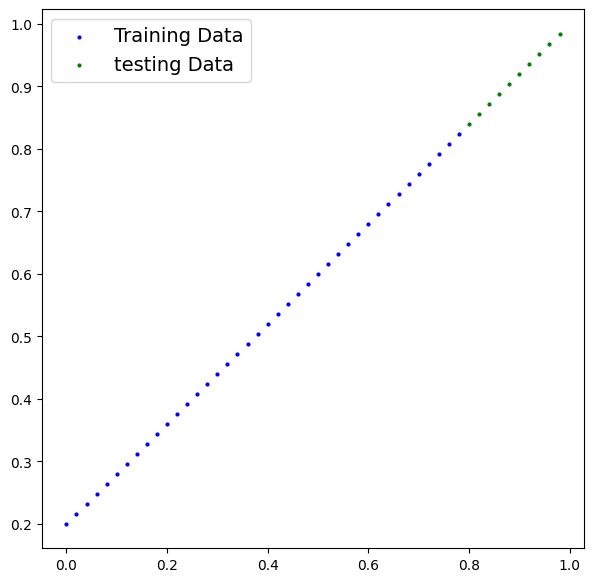

In [34]:
plot_preds(X_train, y_train, X_test, y_test)

## 6.2 Build Model

In [35]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for params
    self.linear_layer = nn.Linear(
        in_features=1, # one input
        out_features=1 # one output
        )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # return self.linear_layer.forward(x)
    return self.linear_layer(x)


In [36]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict(),

(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),)

In [37]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

In [38]:
learning_rate=0.01
loss_fn = nn.L1Loss()
optm = torch.optim.SGD(lr=learning_rate,
                       params=model_1.parameters())

In [39]:
epoch_counts = []
loss_values = []
test_loss_values = []

epochs = 200

torch.manual_seed(42)

# Data on Target Device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # set to train
  model_1.train()
  # 1. forward pass
  y_pred = model_1(X_train)
  # 2. Loss
  loss = loss_fn(y_pred, y_train)
  # 3. Zero Grad
  optm.zero_grad()
  # 4. Back Prop
  loss.backward()
  # 5. Optm step
  optm.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # logging
  if epoch % 10 == 0:
    print(f"k: {epoch} | loss: {loss} | test_loss: {test_loss}")


k: 0 | loss: 0.6161779165267944 | test_loss: 0.5849762558937073
k: 10 | loss: 0.5009680986404419 | test_loss: 0.45026642084121704
k: 20 | loss: 0.3857581913471222 | test_loss: 0.3155565857887268
k: 30 | loss: 0.2705483138561249 | test_loss: 0.180846706032753
k: 40 | loss: 0.15533843636512756 | test_loss: 0.046136897057294846
k: 50 | loss: 0.05875825881958008 | test_loss: 0.06886561214923859
k: 60 | loss: 0.04580378159880638 | test_loss: 0.09473040699958801
k: 70 | loss: 0.041819483041763306 | test_loss: 0.09405827522277832
k: 80 | loss: 0.03831038996577263 | test_loss: 0.08853326737880707
k: 90 | loss: 0.034879546612501144 | test_loss: 0.08094760775566101
k: 100 | loss: 0.03144557774066925 | test_loss: 0.07267507165670395
k: 110 | loss: 0.028006771579384804 | test_loss: 0.06440252810716629
k: 120 | loss: 0.024577612057328224 | test_loss: 0.056816864758729935
k: 130 | loss: 0.021141953766345978 | test_loss: 0.04854437708854675
k: 140 | loss: 0.017704110592603683 | test_loss: 0.040958791

In [40]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

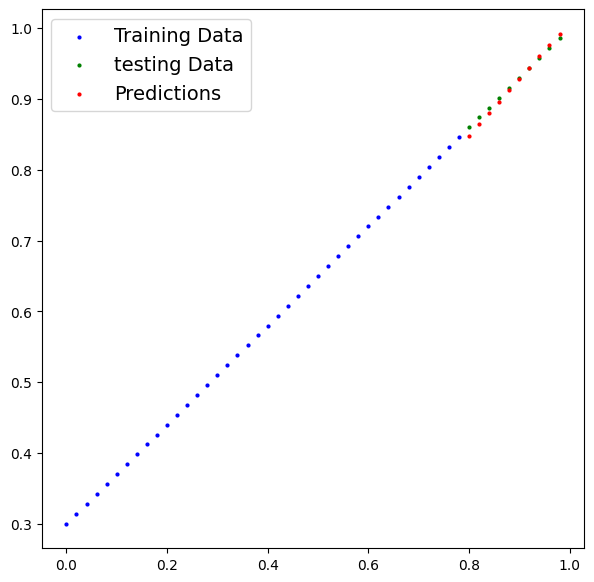

In [42]:
model_1.eval()
with torch.inference_mode():
  y_preds_v1 = model_1(X_test)

y_preds_v1 = np.array(y_preds_v1.cpu().numpy())

plot_preds(predictions=y_preds_v1)

### 6.4 saving and loading

In [43]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_SAVE_PATH = MODEL_PATH / "01_MODEL_1.pth"

MODEL_SAVE_PATH,

(PosixPath('models/01_MODEL_1.pth'),)

In [45]:
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [49]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

loaded_model_1.state_dict(),

(OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2095], device='cuda:0'))]),)

In [50]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_preds = loaded_model_1(X_test)

model_1.eval()
with torch.inference_mode():
    y_preds = loaded_model_1(X_test)

y_preds == loaded_preds,

(tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]], device='cuda:0'),)